In [155]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [156]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [157]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [158]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [159]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [160]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [161]:
inspector = inspect(engine)

columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [162]:
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [163]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [164]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [165]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

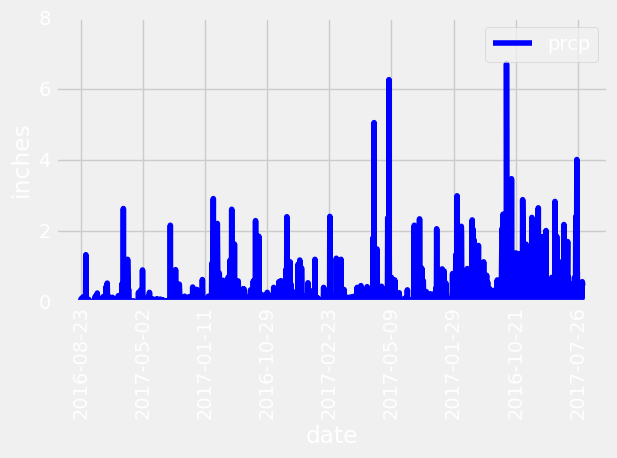

In [166]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
last12Months = session.query(Measurement.date, Measurement.prcp ).filter(Measurement.date >= '2016-08-23').all()

last12Months_df = pd.DataFrame(last12Months).dropna(subset=['prcp'])

last12Months_df

last12Months_df.set_index("date", inplace=True)

last12Months_df.plot(color="blue", ylim = (0,8), rot = 90)
plt.ylabel("inches")
plt.tight_layout()
plt.show()

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data


In [167]:
# Use Pandas to calculate the summary statistics for the precipitation data
last12Months_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [168]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(func.count(func.distinct(Station.station))).scalar()
station_count

9

In [169]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.station))\
    .group_by(Measurement.station)\
    .order_by(func.count(Measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [170]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_stations_data = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs) ).filter(Measurement.station == "USC00519281").all()
most_active_stations_data

[(54.0, 85.0, 71.66378066378067)]

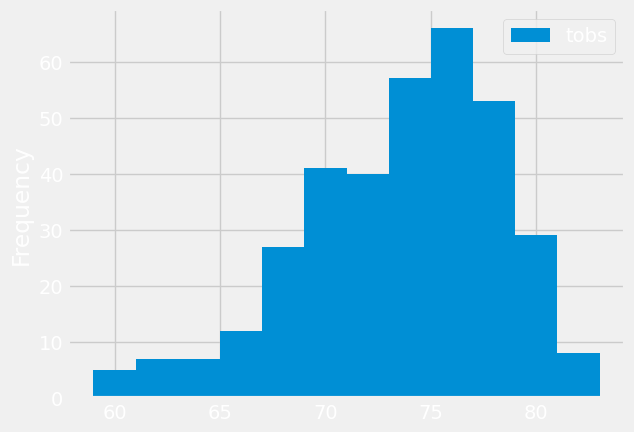

In [173]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


last12Months_most_active_station = session.query( Measurement.tobs )\
                                    .filter(Measurement.date >= '2016-08-23')\
                                    .filter(Measurement.station == "USC00519281")\
                                    .all()

last12Months_most_active_station_df = pd.DataFrame(last12Months_most_active_station).dropna(subset=['tobs'])

last12Months_most_active_station_df

ax = last12Months_most_active_station_df.plot.hist(column=["tobs"], bins=12)



# Close Session

In [172]:
# Close Session
session.close()